In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
import mplcyberpunk
plt.style.use("cyberpunk")

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [162]:
data = pd.read_excel("../../Raw Dataset/US Pathway Complete Data.xlsx", sheet_name="Webinar Leads")

In [163]:
data.columns

Index(['attended', 'Leads ID', 'phone', 'registration_time', 'approval_status',
       'join_time', 'leave_time', 'time_in_session', 'is_guest',
       'country_region_name', 'source_name', 'original_source', 'contacted',
       'webinar_date'],
      dtype='object')

In [164]:
data[data['Leads ID'].isna()==False]

,attended,Leads ID,phone,registration_time,approval_status,join_time,leave_time,time_in_session,is_guest,country_region_name,source_name,original_source,contacted,webinar_date
3478,No,l:879498367199720,'97163,2024-04-01 12:19:22,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-04-06
3479,No,l:1557010118210834,'9197,2024-03-26 12:04:01,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-03-30
4273,No,l:311252251913225,NaN,2024-01-20 14:24:45,approved,NaT,NaT,0,--,NaN,NaN,Zoom Webinar,NaN,2024-01-27
4331,No,l:1191806425036056,NaN,2024-03-05 11:12:13,approved,NaT,NaT,0,--,NaN,NaN,Facebook,NaN,2024-03-09
7057,No,l:1532891610891651,NaN,2024-03-05 11:12:13,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42778,No,l:606538194991072,'919561296555,2024-02-04 17:28:02,approved,NaT,NaT,0,--,NaN,NaN,NaN,Contacted,2024-02-10
42780,No,l:1107499463603544,'12404372528,2024-01-30 16:39:19,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-02-03
42781,No,l:7336513659702987,'17172737475,2024-02-07 23:09:25,approved,NaT,NaT,0,--,NaN,NaN,Zoom Webinar,NaN,2024-02-10
42782,No,l:416116077490963,'919310381911,2024-02-06 21:52:35,approved,NaT,NaT,0,--,NaN,NaN,NaN,Contacted,2024-02-10


In [165]:
data[data['country_region_name'].isna()==False]['country_region_name'].value_counts()

India                   4489
United States             34
United Kingdom            13
United Arab Emirates       5
France                     3
Canada                     3
Nepal                      2
Zambia                     2
Germany                    2
Oman                       2
Japan                      2
Australia                  1
Singapore                  1
Saudi Arabia               1
Tanzania                   1
Sweden                     1
Kenya                      1
Spain                      1
Bangladesh                 1
Bahrain                    1
Benin                      1
Jordan                     1
Philippines                1
Pakistan                   1
Kuwait                     1
Lithuania                  1
Afghanistan                1
Name: country_region_name, dtype: int64

In [166]:
x = data[(data['source_name'].isna()==False)]['source_name'].value_counts()
x

Whatsapp Promotions         5489
Linkedin InMail             4895
Inagiffy Email              1207
 Supriya Telecaller          529
Shiva Telecaller             384
Sneha Telecaller             379
Facebook Ads                 204
Whatsapp Groups External     106
Instagram                     61
Likita Telecaller             36
Career Labs                   23
Neha Telecaller               18
Telegram                      13
Linkedin groups                6
Email                          1
Youtube                        1
Name: source_name, dtype: int64

In [177]:
x = data[(data['source_name'].isna()==False) & (data['attended']=="Yes")]['source_name'].value_counts()
x

Whatsapp Promotions         2577
Inagiffy Email               380
 Supriya Telecaller          352
Shiva Telecaller             286
Sneha Telecaller             256
Linkedin InMail              192
Facebook Ads                 152
Instagram                     16
Whatsapp Groups External      11
Neha Telecaller                7
Likita Telecaller              6
Career Labs                    2
Linkedin groups                2
Telegram                       1
Name: source_name, dtype: int64

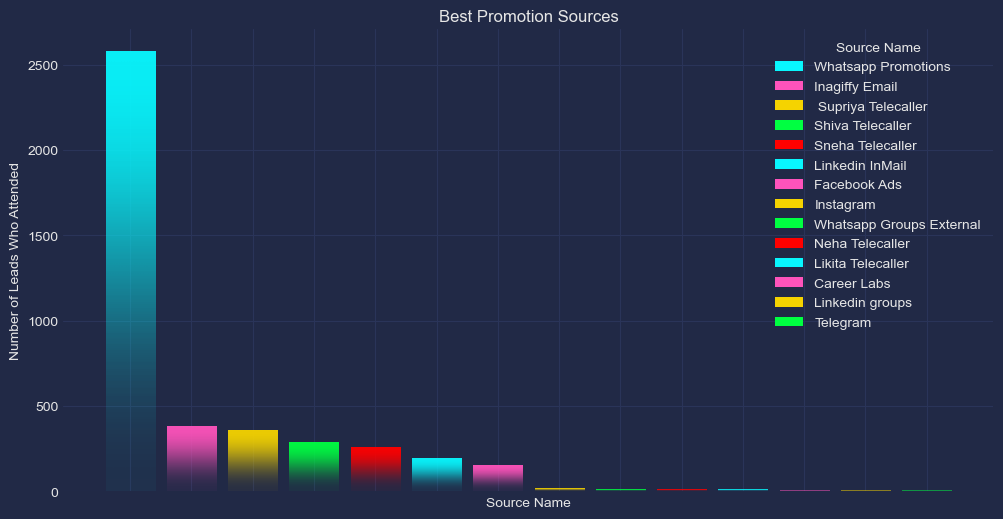

In [178]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = ["C0", "C1", "C2", "C3", "C4"]
source_names = x.index
bar = ax.bar(source_names, x.values, color=colors)
plt.title('Best Promotion Sources')
plt.xlabel('Source Name')
plt.ylabel('Number of Leads Who Attended')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mplcyberpunk.add_bar_gradient(bars=bar)
ax.legend(bar, source_names, title="Source Name", loc='upper right')
plt.show()


In [179]:
z = pd.DataFrame(data[(data['original_source'].isna()==False) & (data['attended']=="Yes")]['original_source'].value_counts())
z

,original_source
Facebook,1403
Zoom Webinar,1107
LinkedIn,706
N-DB,285
Placement Drive,128
Linkedin Inmail,126
B.Tech 19-20 Grad,84
OS,66
US Pathway,53
1% Club,24


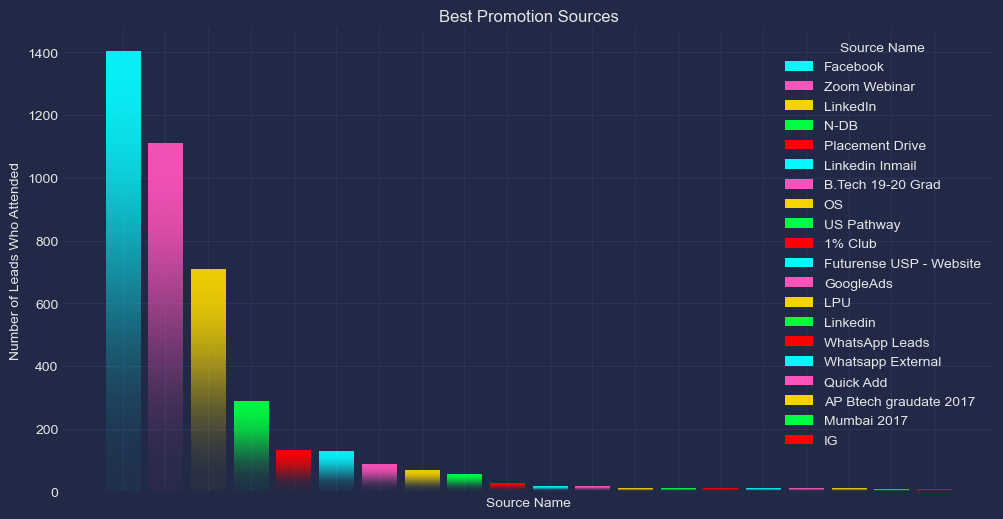

In [182]:
z = z[:20]
fig, ax = plt.subplots(figsize=(12, 6))
colors = ["C0", "C1", "C2", "C3", "C4"]
values = [i[0] for i in z.values]
bar = ax.bar(z.index.astype('str'), values, color=colors)
plt.title('Best Promotion Sources')
plt.xlabel('Source Name')
plt.ylabel('Number of Leads Who Attended')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mplcyberpunk.add_bar_gradient(bars=bar)
ax.legend(bar, z.index.astype('str'), title="Source Name", loc='upper right')
plt.show()

In [185]:
data['attended'].value_counts()

No     38210
Yes     4574
Name: attended, dtype: int64

In [189]:
print(data[(data['original_source']=="N-DB") & (data["attended"]=="Yes")].shape)
print(data[(data['original_source']=="N-DB") & (data["attended"]=="No")].shape)

(285, 14)
(977, 14)


In [ ]:
values = [i[0] for i in x.values]
fig, ax = plt.subplots(figsize=(12, 6))
colors = ["C0", "C1", "C2", "C3", "C4"]
values = [i[0] for i in x.values]
bar = ax.bar(a, values, color=colors)
plt.title('Best Promotion Sources')
plt.xlabel('Source Name')
plt.ylabel('Number of Leads Who Attended')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mplcyberpunk.add_bar_gradient(bars=bar)
ax.legend(bar, source_names, title="Source Name", loc='upper right')
plt.show()

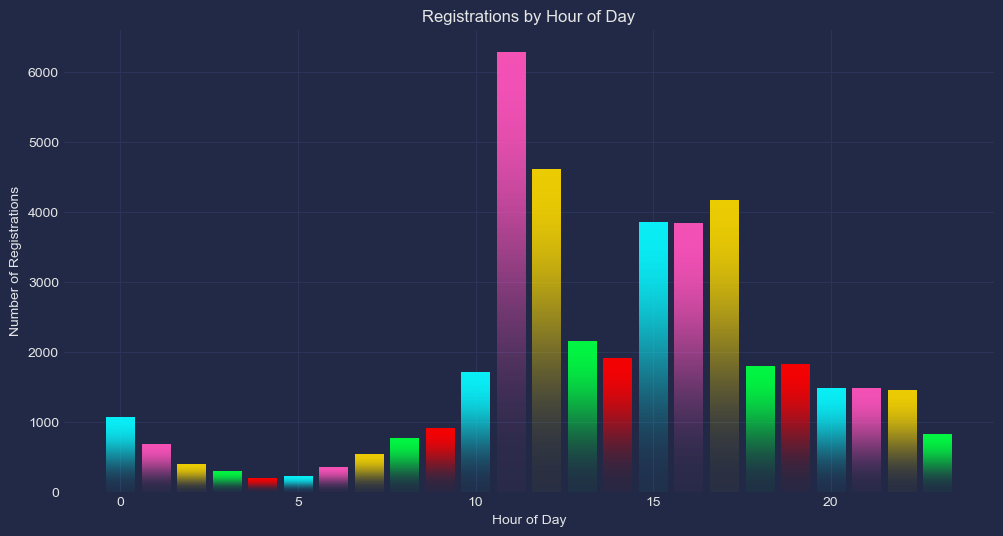

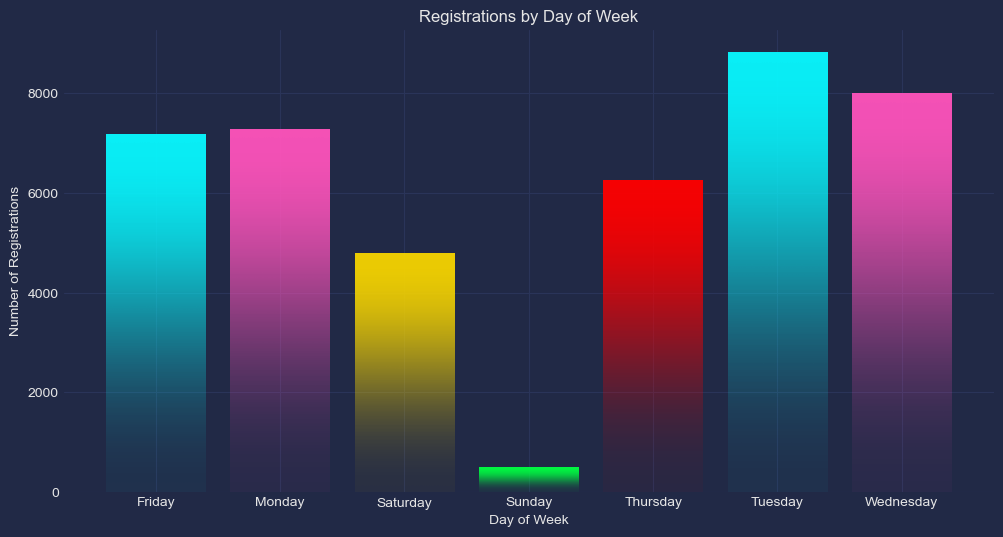

Peak registration hour: 11
Peak registration day: Tuesday
Hour with highest attendance rate: 12


In [190]:
data['registration_time'] = pd.to_datetime(data['registration_time'], format='%d-%m-%Y %H:%M')


data['hour'] = data['registration_time'].dt.hour
data['day_of_week'] = data['registration_time'].dt.dayofweek
data['day_name'] = data['registration_time'].dt.day_name()

hourly_registrations = data.groupby('hour').size()
hourly_attendance_rate = data[data['attended'] == "Yes"].groupby('hour').size() / hourly_registrations

colors = ["C0", "C1", "C2", "C3", "C4"]

# plt.figure(figsize=(12, 6))
# plt.bar(hourly_registrations.index, hourly_registrations.values)
# plt.title('Registrations by Hour of Day')
# plt.xlabel('Hour of Day')
# plt.ylabel('Number of Registrations')
# plt.show()
fig, ax = plt.subplots(figsize=(12,6))
bar = ax.bar(hourly_registrations.index, hourly_registrations.values, color=colors)
plt.title('Registrations by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Registrations')
mplcyberpunk.add_bar_gradient(bars=bar)
plt.show()



weekly_registrations = data.groupby('day_name').size()
fig, ax = plt.subplots(figsize=(12,6))
bar = ax.bar(weekly_registrations.index, weekly_registrations.values, color=colors)
plt.title('Registrations by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Registrations')
mplcyberpunk.add_bar_gradient(bars=bar)
plt.show()

# Identify peak registration times
peak_hour = hourly_registrations.idxmax()
peak_day = weekly_registrations.idxmax()

print(f"Peak registration hour: {peak_hour}")
print(f"Peak registration day: {peak_day}")

# If you have 'attended' data
if 'attended' in data.columns:
    best_conversion_hour = hourly_attendance_rate.idxmax()
    print(f"Hour with highest attendance rate: {best_conversion_hour}")

In [ ]:
data['webinar_date'] = pd.to_datetime(data['webinar_date'])
data['days_before_webinar'] = (data['webinar_date'] - data['registration_time']).dt.days
data['is_early'] = data['days_before_webinar'] > 7

In [ ]:
early_attendance_rate = data[(data['is_early']) & (data['attended']=="Yes")].mean()
late_attendance_rate = data[(~data['is_early']) & (data['attended']=="Yes")].mean()

In [ ]:
early_attendance_rate, late_attendance_rate

(time_in_session        36.932018
 hour                   14.322368
 day_of_week             2.526316
 days_before_webinar    14.951754
 is_early                1.000000
 dtype: float64,
 time_in_session        39.862555
 hour                   13.512142
 day_of_week             3.554881
 days_before_webinar     0.347499
 is_early                0.000000
 dtype: float64)

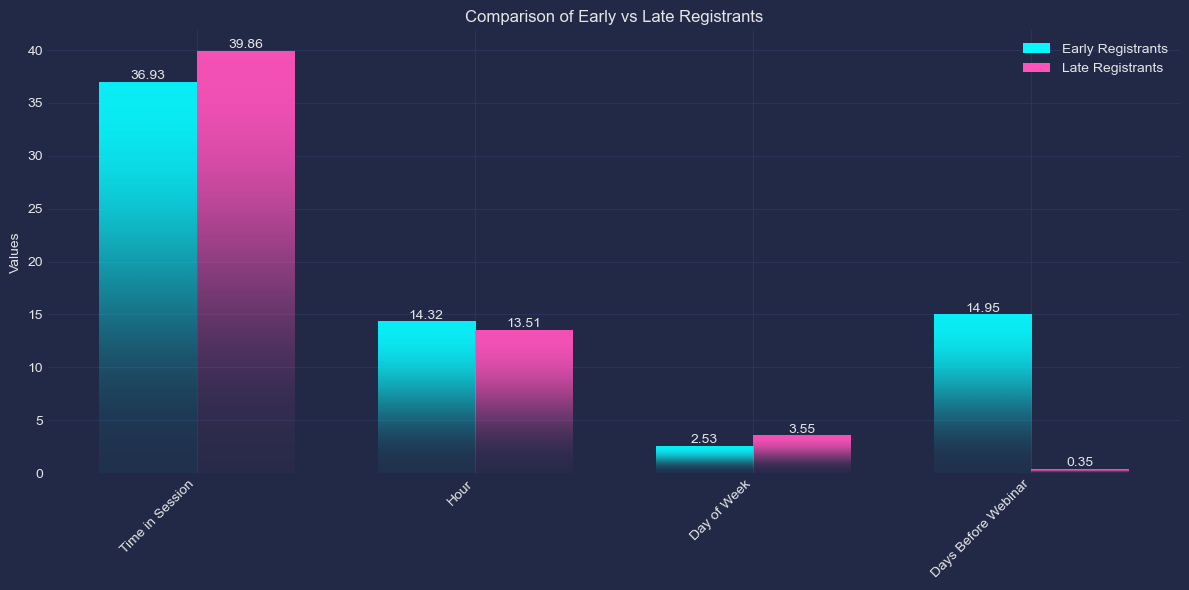

In [ ]:
early_data = [36.932018, 14.322368, 2.526316, 14.951754]
late_data = [39.862555, 13.512142, 3.554881, 0.347499]
metrics = ['Time in Session', 'Hour', 'Day of Week', 'Days Before Webinar']

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = np.arange(len(metrics))

bar1 = ax.bar(x - width/2, early_data, width, label='Early Registrants')
bar2 = ax.bar(x + width/2, late_data, width, label='Late Registrants')

ax.set_ylabel('Values')
ax.set_title('Comparison of Early vs Late Registrants')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

for i, v in enumerate(early_data):
    ax.text(i - width/2, v, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(late_data):
    ax.text(i + width/2, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
mplcyberpunk.add_bar_gradient(bars=bar1)
mplcyberpunk.add_bar_gradient(bars=bar2)

plt.show()

In [ ]:
early_attendance_rate, late_attendance_rate

(time_in_session        36.932018
 hour                   14.322368
 day_of_week             2.526316
 days_before_webinar    14.951754
 is_early                1.000000
 dtype: float64,
 time_in_session        39.862555
 hour                   13.512142
 day_of_week             3.554881
 days_before_webinar     0.347499
 is_early                0.000000
 dtype: float64)

- Early registrants: 36.93 (units, presumably minutes)
- Late registrants: 39.86 (units, presumably minutes)
Interestingly, late registrants seem to spend slightly more time in the session on average (about 3 minutes more).

- Early registrants: 2.53 (closer to Wednesday)
- Late registrants: 3.55 (closer to Thursday)
Late registrants tend to register later in the week.

- Early registrants: 14.95 days before
- Late registrants: 0.35 days before
This shows a clear distinction in your definition of early vs. late. Early registrants sign up about 2 weeks before the webinar, while late registrants sign up on average less than a day before.

Late registrants, despite registering very close to the webinar date, actually spend slightly more time in the session. This could suggest that immediacy or recent decision-making might lead to more engagement.

Since late registrants show slightly higher engagement (more time in session), consider creating a strong last-minute push for registrations. This could include reminder emails or ads in the days leading up to the webinar.

- Start your main promotional push about 2-3 weeks before the webinar to capture early registrants.
- Have a second wave of promotions in the last 2-3 days before the webinar to capture engaged late registrants.

Consider scheduling promotional emails or ads slightly later in the day (around 2-3 PM) and earlier in the week for early registrants, and earlier in the day and later in the week for last-minute promotions

Segmented Follow-ups: Create different follow-up strategies for early and late registrants. Early registrants might need more reminders as the webinar approaches, while late registrants might benefit from immediate, concise information.
Content Strategy: For early registrants, provide more detailed information and build anticipation over time. For late registrants, focus on quick, high-impact messages that emphasize the immediate value of attending.


In [ ]:
data.columns

Index(['attended', 'Leads ID', 'phone', 'registration_time', 'approval_status',
       'join_time', 'leave_time', 'time_in_session', 'is_guest',
       'country_region_name', 'source_name', 'original_source', 'contacted',
       'webinar_date', 'hour', 'day_of_week', 'day_name',
       'days_before_webinar', 'is_early'],
      dtype='object')

In [ ]:
data[(data['is_guest'].isna()==False) & (data['is_guest']!="--")]['is_guest'].value_counts()

Yes    4572
No        1
Name: is_guest, dtype: int64

Total Registrations: 42784
Total Attendees: 4574
Conversion Rate: 10.69%


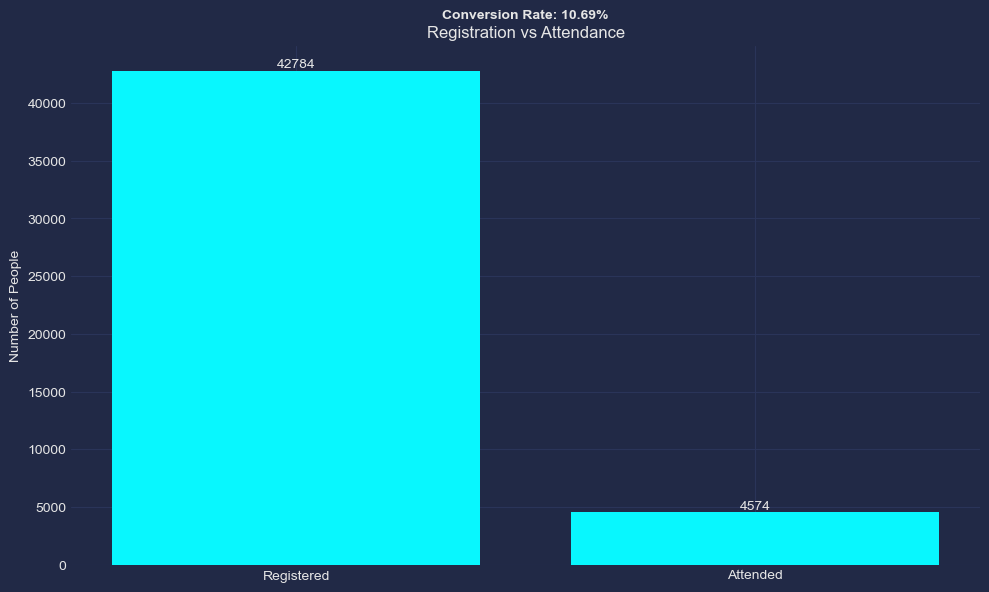

In [ ]:
total_registrations = len(data)
attendees = len(data[data['attended']=="Yes"])
conversion_rate = attendees / total_registrations
print(f"Total Registrations: {total_registrations}")
print(f"Total Attendees: {attendees}")
print(f"Conversion Rate: {conversion_rate:.2%}")
labels = ['Registered', 'Attended']
values = [total_registrations, attendees]
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title('Registration vs Attendance')
plt.ylabel('Number of People')
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add conversion rate annotation
plt.text(0.5, max(values)*1.1, f"Conversion Rate: {conversion_rate:.2%}", 
         ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

A low conversion rate might indicate issues with:

Reminder emails not being effective
The webinar time not being convenient for registrants
Loss of interest between registration and the event
Technical difficulties in joining the webinar

In [ ]:
data['attended'].value_counts()

No     38210
Yes     4574
Name: attended, dtype: int64

In [ ]:
data['attended'] = data['attended'].replace("Yes",1).replace("No",0)
data['attended'] = pd.to_numeric(data['attended'])

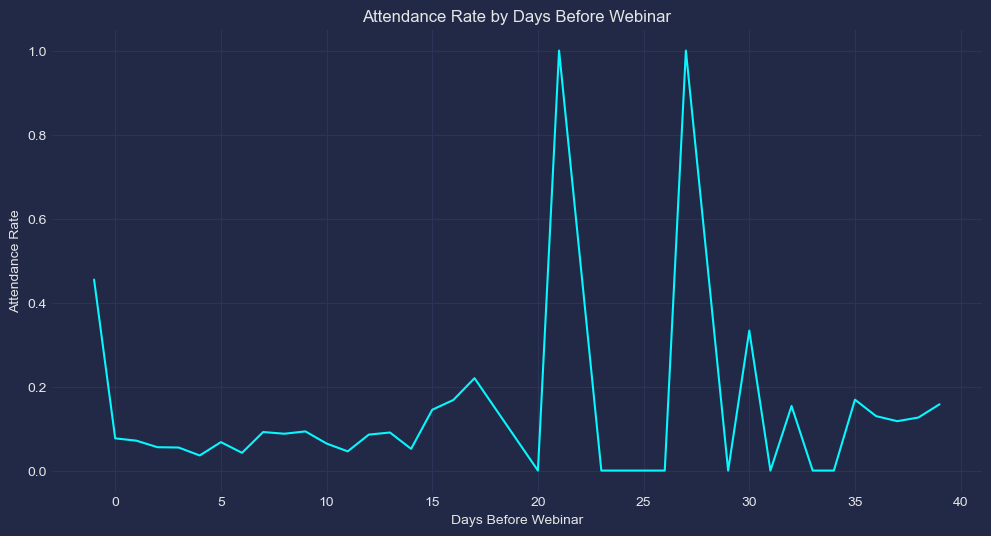

In [ ]:
data['registration_time'] = pd.to_datetime(data['registration_time'])
data['days_before_webinar'] = (data['webinar_date'] - data['registration_time']).dt.days
attendance_by_time = data.groupby('days_before_webinar')['attended'].mean()
plt.figure(figsize=(12, 6))
attendance_by_time.plot()
plt.title('Attendance Rate by Days Before Webinar')
plt.xlabel('Days Before Webinar')
plt.ylabel('Attendance Rate')
plt.show()

In [ ]:
# Calculate attendance rates by country
country_attendance_rates = country_contingency.div(country_contingency.sum(axis=1), axis=0)[1]

# Sort and display top and bottom 5 countries by attendance rate
print("Top 5 countries by attendance rate:")
print(country_attendance_rates.sort_values(ascending=False).head())
print("\nBottom 5 countries by attendance rate:")
print(country_attendance_rates.sort_values(ascending=True).head())

Top 5 countries by attendance rate:
country_region_name
Afghanistan             1.0
Nepal                   1.0
United States           1.0
United Kingdom          1.0
United Arab Emirates    1.0
Name: 1, dtype: float64

Bottom 5 countries by attendance rate:
country_region_name
Afghanistan             1.0
United Kingdom          1.0
United Arab Emirates    1.0
Tanzania                1.0
Sweden                  1.0
Name: 1, dtype: float64


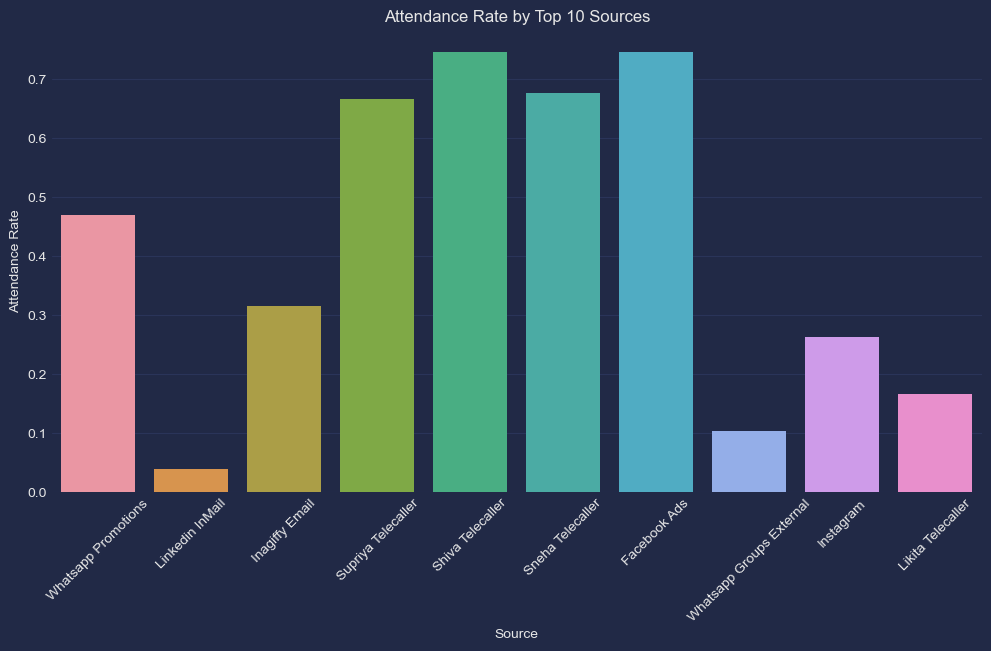

In [ ]:
source_attendance = data.groupby('source_name')['attended'].agg(['count', 'mean'])
source_attendance = source_attendance.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=source_attendance.index, y='mean', data=source_attendance)
plt.title('Attendance Rate by Top 10 Sources')
plt.xlabel('Source')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.show()

In [193]:
data['attended'] = data['attended'].replace("Yes",1).replace("No",0)

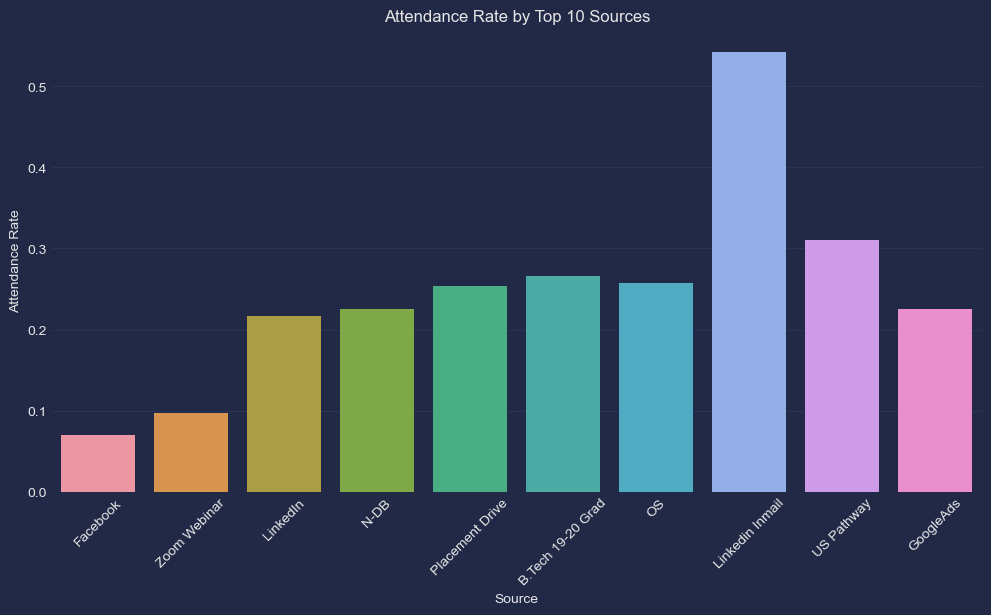

In [194]:
source_attendance = data.groupby('original_source')['attended'].agg(['count', 'mean'])
source_attendance = source_attendance.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=source_attendance.index, y='mean', data=source_attendance)
plt.title('Attendance Rate by Top 10 Sources')
plt.xlabel('Source')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['contacted'].value_counts()

Contacted    33688
Name: contacted, dtype: int64

In [ ]:
source_contingency = pd.crosstab(data['source_name'], data['attended'])
chi2, p_value, _, _ = chi2_contingency(source_contingency)
print(f"Source Chi-square p-value: {p_value}")

Source Chi-square p-value: 0.0


In [ ]:
data[(data['attended']==1) & (data['contacted']=="Contacted")].shape

(4415, 19)

In [ ]:
data.shape, data[data['contacted']=="Contacted"].shape

((42784, 19), (33688, 19))

In [ ]:
data[data['attended']==1].shape

(4574, 19)

Engagement Statistics:
                 time_in_session  contacted  count
segment                                           
High engagement        63.844532   0.964866    798
Low engagement         15.521133   0.966013    667
Non-attendees           0.000000   0.766094  28161


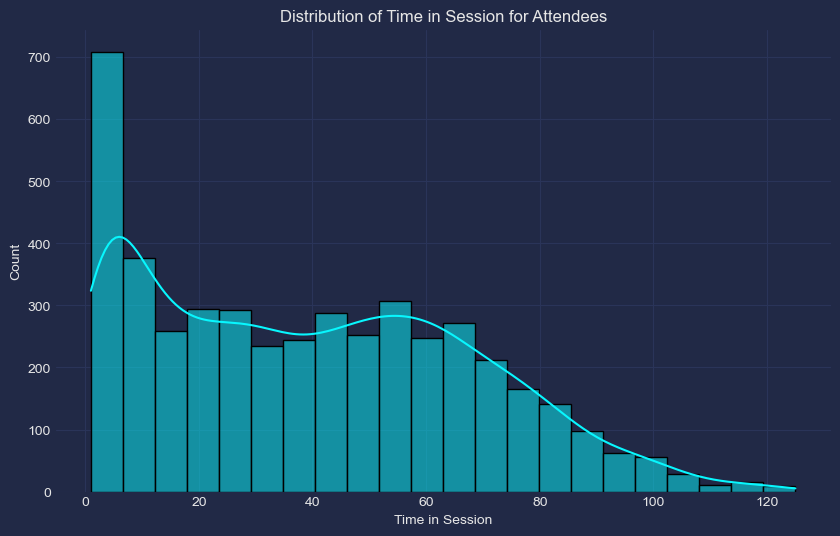


Follow-up Effectiveness:
                 contact_rate  conversion_rate
segment                                       
High engagement      0.964866         0.492945
Low engagement       0.966013         0.470005
Non-attendees        0.766094         0.502289


<Figure size 1200x600 with 0 Axes>

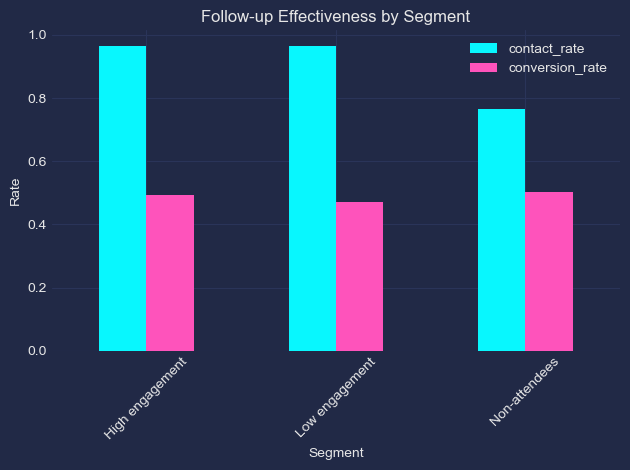

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your data is in a DataFrame called 'df'

# 1. Segment your audience
# First, separate non-attendees (time_in_session == 0) from attendees
df['segment'] = np.where(df['time_in_session'] == 0, 'Non-attendees', 'Attendees')

# For attendees, further segment based on engagement level
attendees = df[df['time_in_session'] > 0]
median_time = attendees['time_in_session'].median()

df.loc[df['segment'] == 'Attendees', 'segment'] = pd.cut(
    df.loc[df['segment'] == 'Attendees', 'time_in_session'],
    bins=[0, median_time, float('inf')],
    labels=['Low engagement', 'High engagement']
)

# 2. Analyze engagement metrics
df['contacted'] = df['contacted'].replace("Contacted",1).fillna(0).replace("--",0)
df['contacted'] = pd.to_numeric(df['contacted'])
engagement_stats = df.groupby('segment').agg({
    'time_in_session': 'mean',
    'contacted': 'mean',
    'Leads ID': 'count'
}).rename(columns={'Leads ID': 'count'})

print("Engagement Statistics:")
print(engagement_stats)

# Visualize engagement distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['time_in_session'] > 0], x='time_in_session', kde=True)
plt.title('Distribution of Time in Session for Attendees')
plt.xlabel('Time in Session')
plt.show()

# 3. Analyze follow-up effectiveness
# Assuming 'contacted' is a boolean column and 'some_conversion_metric' exists
# If 'some_conversion_metric' doesn't exist, replace it with another relevant metric
if 'some_conversion_metric' not in df.columns:
    df['some_conversion_metric'] = np.random.choice([True, False], size=len(df))  # placeholder
df['contacted'] = df['contacted'].astype(bool)
follow_up_effectiveness = df.groupby('segment').apply(lambda x: 
    pd.Series({
        'contact_rate': x['contacted'].mean(),
        'conversion_rate': (x['contacted'] & x['some_conversion_metric']).sum() / x['contacted'].sum() if x['contacted'].sum() > 0 else 0
    })
)

print("\nFollow-up Effectiveness:")
print(follow_up_effectiveness)

# Visualize follow-up effectiveness
plt.figure(figsize=(12, 6))
follow_up_effectiveness.plot(kind='bar')
plt.title('Follow-up Effectiveness by Segment')
plt.xlabel('Segment')
plt.ylabel('Rate')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def generate_follow_up_strategy(row):
    if row['segment'] == 'Non-attendees':
        return 'Send recording, offer demo, invite to future webinars'
    elif row['segment'] == 'Low engagement':
        return 'Send summary, offer additional resources, ask for feedback'
    else:
        return 'Provide in-depth content, offer exclusive access, invite to advisory board'

df['follow_up_strategy'] = df.apply(generate_follow_up_strategy, axis=1)

# Export strategies for your marketing team
df[['Leads ID', 'segment', 'follow_up_strategy']].to_csv('follow_up_strategies.csv', index=False)

Attendance Rates:
attendee_type
Registered    0.106909
Name: attended, dtype: float64

Engagement Metrics:
              time_in_session         attended Leads ID
                         mean median      mean    count
attendee_type                                          
Registered           4.230437    0.0  0.106909    29626


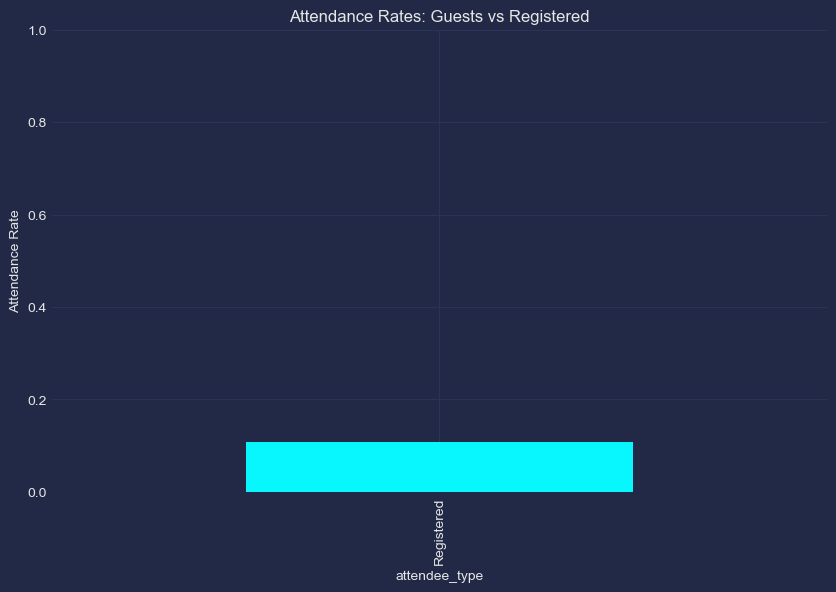

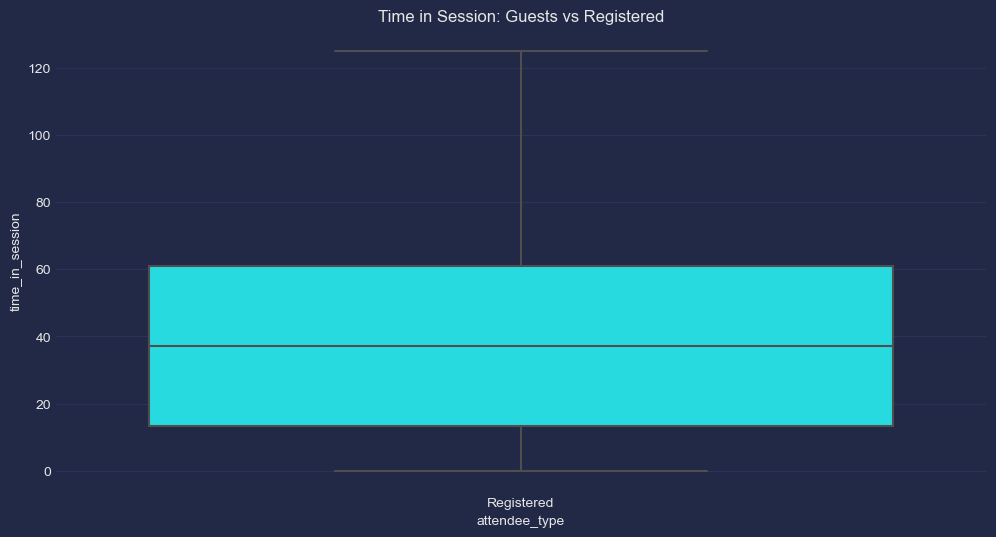


t-test for Time in Session: t-statistic = nan, p-value = nan

Detailed Time in Session Analysis:
                    mean  median  percentile_25  percentile_75  max
attendee_type                                                      
Registered     39.570398    37.0          13.25           61.0  125


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Assuming your data is in a DataFrame called 'df'

# 1. Separate guests and registered attendees
df['attendee_type'] = np.where(df['is_guest'] == 1, 'Guest', 'Registered')

# 2. Compare attendance rates
attendance_rates = df.groupby('attendee_type')['attended'].mean()
print("Attendance Rates:")
print(attendance_rates)

# 3. Analyze engagement metrics
engagement_metrics = df.groupby('attendee_type').agg({
    'time_in_session': ['mean', 'median'],
    'attended': 'mean',
    'Leads ID': 'count'
})
print("\nEngagement Metrics:")
print(engagement_metrics)

# 4. Compare interaction rates (if available)
# Assuming you have a column for interactions, e.g., 'num_questions_asked'
if 'num_questions_asked' in df.columns:
    interaction_rates = df.groupby('attendee_type')['num_questions_asked'].mean()
    print("\nInteraction Rates:")
    print(interaction_rates)

# 5. Visualize the differences

# Attendance rates
plt.figure(figsize=(10, 6))
attendance_rates.plot(kind='bar')
plt.title('Attendance Rates: Guests vs Registered')
plt.ylabel('Attendance Rate')
plt.ylim(0, 1)
plt.show()

# Time in session distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='attendee_type', y='time_in_session', data=df[df['attended'] == 1])
plt.title('Time in Session: Guests vs Registered')
plt.show()

# Statistical test for time in session
guests_time = df[(df['attendee_type'] == 'Guest') & (df['attended'] == 1)]['time_in_session']
registered_time = df[(df['attendee_type'] == 'Registered') & (df['attended'] == 1)]['time_in_session']
t_stat, p_value = stats.ttest_ind(guests_time, registered_time)
print(f"\nt-test for Time in Session: t-statistic = {t_stat}, p-value = {p_value}")

# Function to calculate percentiles
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

# Detailed time in session analysis
time_analysis = df[df['attended'] == 1].groupby('attendee_type')['time_in_session'].agg([
    'mean', 'median', percentile(25), percentile(75), 'max'
])
print("\nDetailed Time in Session Analysis:")
print(time_analysis)

Distribution of Approval Statuses:
approved             0.998574
cancelled by self    0.000748
denied               0.000678
Name: approval_status, dtype: float64

Attendance Rates by Approval Status:
approval_status
approved             0.10636
cancelled by self    0.03125
denied               1.00000
Name: attended, dtype: float64

Engagement Metrics by Approval Status:
     approval_status  mean_time  median_time  attendee_count
0           approved  39.700704         37.5            1457
1  cancelled by self   5.000000          5.0               0
2             denied  20.344828         13.0               9


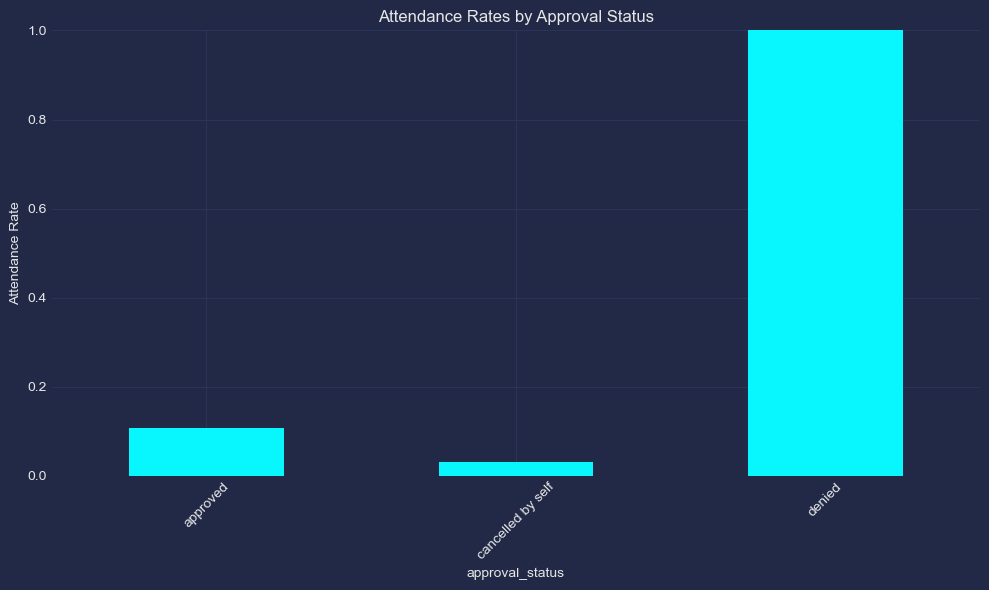

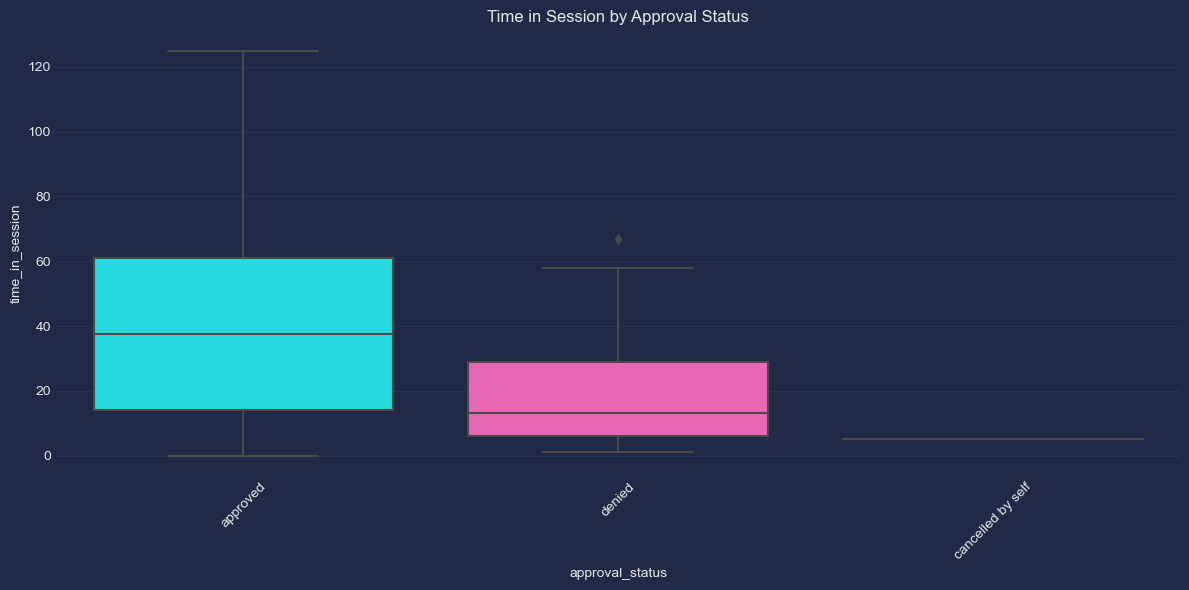


Chi-square test for Attendance Rates:
Chi-square statistic: 244.31205451079487
p-value: 8.877924181042391e-54

One-way ANOVA for Time in Session:
F-statistic: 7.4992491591769435
p-value: 0.0005603367424155659

Conversion Funnel by Approval Status:
                   total  attended  engaged  attendance_rate  engagement_rate
approval_status                                                              
approved           29605      4544     4542         0.153488          0.99956
cancelled by self     12         1        1         0.083333          1.00000
denied                 9        29       29         3.222222          1.00000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Assuming your data is in a DataFrame called 'df'

# 1. Examine the distribution of approval statuses
approval_distribution = df['approval_status'].value_counts(normalize=True)
print("Distribution of Approval Statuses:")
print(approval_distribution)

# 2. Analyze attendance rates by approval status
attendance_rates = df.groupby('approval_status')['attended'].mean()
print("\nAttendance Rates by Approval Status:")
print(attendance_rates)

# 3. Compare engagement metrics across approval statuses
engagement_metrics = df[df['attended'] == 1].groupby('approval_status').agg({
    'time_in_session': ['mean', 'median'],
    'Leads ID': 'count'
}).reset_index()
engagement_metrics.columns = ['approval_status', 'mean_time', 'median_time', 'attendee_count']
print("\nEngagement Metrics by Approval Status:")
print(engagement_metrics)

# 4. Visualize the relationships

# Attendance rates
plt.figure(figsize=(10, 6))
attendance_rates.plot(kind='bar')
plt.title('Attendance Rates by Approval Status')
plt.ylabel('Attendance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time in session distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='approval_status', y='time_in_session', data=df[df['attended'] == 1])
plt.title('Time in Session by Approval Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Perform statistical tests

# Chi-square test for attendance rates
contingency_table = pd.crosstab(df['approval_status'], df['attended'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test for Attendance Rates:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

# One-way ANOVA for time in session
approval_groups = [group for _, group in df[df['attended'] == 1].groupby('approval_status')['time_in_session']]
f_statistic, p_value = stats.f_oneway(*approval_groups)
print(f"\nOne-way ANOVA for Time in Session:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# 6. Additional analysis: Conversion funnel
funnel_data = df.groupby('approval_status').agg({
    'Leads ID': 'count',
    'attended': 'sum',
    'time_in_session': lambda x: (x > 0).sum()
}).rename(columns={'Leads ID': 'total', 'attended': 'attended', 'time_in_session': 'engaged'})
funnel_data['attendance_rate'] = funnel_data['attended'] / funnel_data['total']
funnel_data['engagement_rate'] = funnel_data['engaged'] / funnel_data['attended']
print("\nConversion Funnel by Approval Status:")
print(funnel_data)

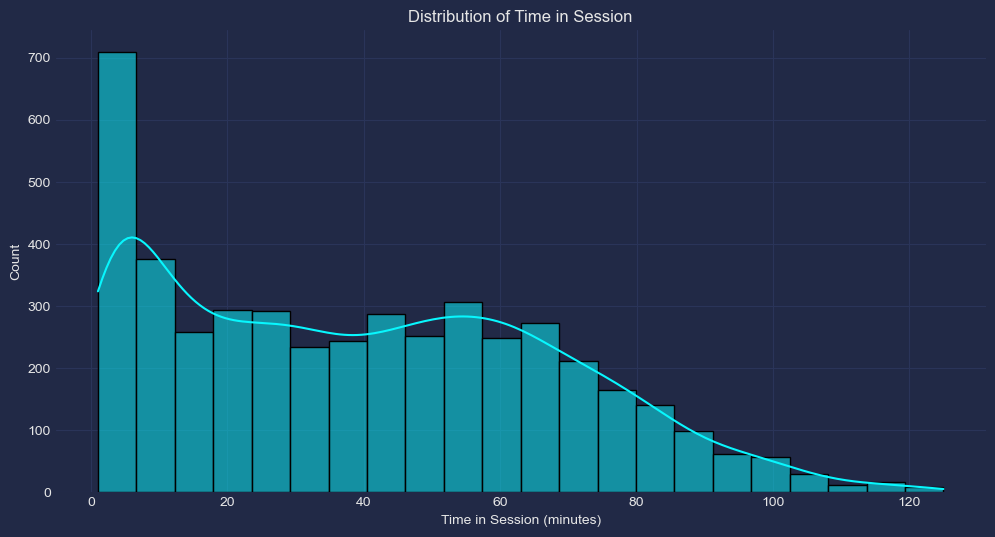

Summary Statistics of Time in Session:
count    4572.000000
mean       39.587708
std        28.309706
min         1.000000
25%        14.000000
50%        37.000000
75%        61.000000
max       125.000000
Name: time_in_session, dtype: float64

Engagement Level Distribution (Percentile Method):
Medium    0.481627
Low       0.262467
High      0.255906
Name: engagement_level, dtype: float64

Engagement Level Distribution (Standard Deviation Method):
Normal    0.81671
High      0.18329
Name: engagement_level_std, dtype: float64

Characteristics of Highly Engaged Attendees:

Top 5 country_region_name for Highly Engaged Attendees:
India             1151
United States        5
United Kingdom       4
Germany              2
Japan                2
Name: country_region_name, dtype: int64

Top 5 source_name for Highly Engaged Attendees:
Whatsapp Promotions    660
Inagiffy Email          90
 Supriya Telecaller     88
Shiva Telecaller        75
Sneha Telecaller        72
Name: source_name, dtype: 

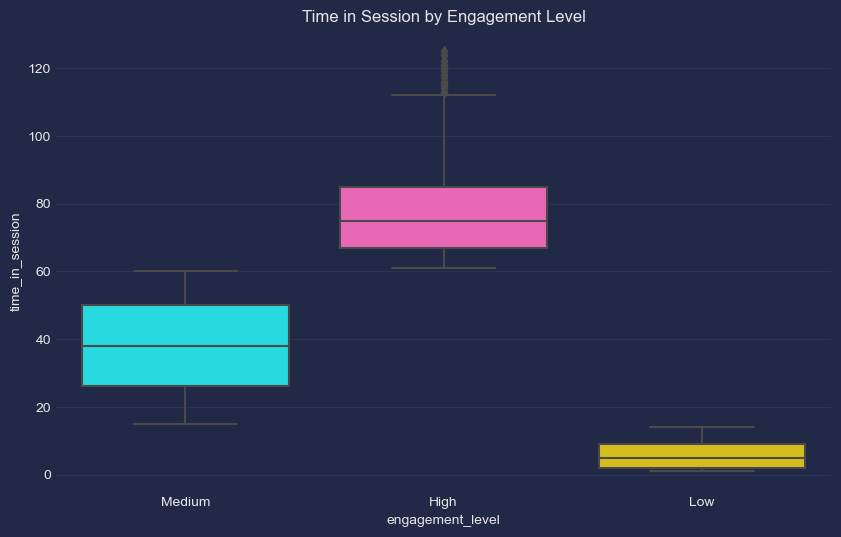


Correlation with Time in Session:
time_in_session    1.000000
hour               0.035734
day_of_week       -0.074062
attended                NaN
Name: time_in_session, dtype: float64


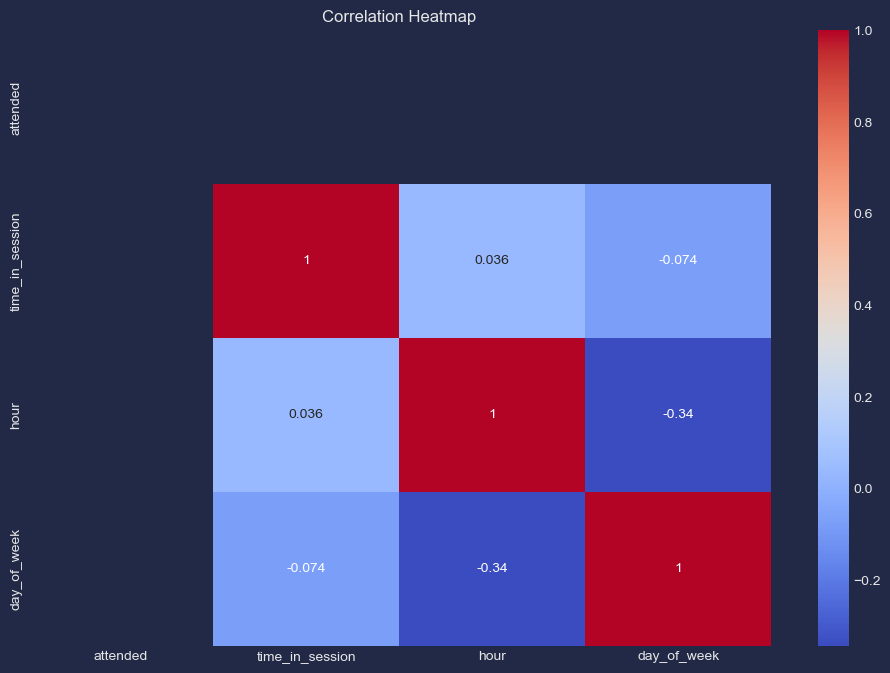

In [197]:
df = data.copy()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your data is in a DataFrame called 'df'

# Filter out non-attendees
attendees = df[df['time_in_session'] > 0]

# 1. Analyze the distribution of 'time_in_session'
plt.figure(figsize=(12, 6))
sns.histplot(attendees['time_in_session'], kde=True)
plt.title('Distribution of Time in Session')
plt.xlabel('Time in Session (minutes)')
plt.show()

print("Summary Statistics of Time in Session:")
print(attendees['time_in_session'].describe())

# 2. Define engagement levels
# Method 1: Using percentiles
low_engagement = attendees['time_in_session'].quantile(0.25)
high_engagement = attendees['time_in_session'].quantile(0.75)

# Method 2: Using standard deviations
mean_time = attendees['time_in_session'].mean()
std_time = attendees['time_in_session'].std()
high_engagement_std = mean_time + std_time

# 3. Segment attendees based on engagement
def engagement_level(time):
    if time <= low_engagement:
        return 'Low'
    elif time >= high_engagement:
        return 'High'
    else:
        return 'Medium'

attendees['engagement_level'] = attendees['time_in_session'].apply(engagement_level)

# Alternative segmentation using standard deviation
attendees['engagement_level_std'] = np.where(attendees['time_in_session'] >= high_engagement_std, 'High', 'Normal')

print("\nEngagement Level Distribution (Percentile Method):")
print(attendees['engagement_level'].value_counts(normalize=True))

print("\nEngagement Level Distribution (Standard Deviation Method):")
print(attendees['engagement_level_std'].value_counts(normalize=True))

# 4. Analyze characteristics of highly engaged attendees
highly_engaged = attendees[attendees['engagement_level'] == 'High']

print("\nCharacteristics of Highly Engaged Attendees:")
for column in ['country_region_name', 'source_name', 'approval_status']:
    if column in highly_engaged.columns:
        print(f"\nTop 5 {column} for Highly Engaged Attendees:")
        print(highly_engaged[column].value_counts().nlargest(5))

# 5. Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='engagement_level', y='time_in_session', data=attendees)
plt.title('Time in Session by Engagement Level')
plt.show()

# Correlation with other numeric variables
numeric_cols = attendees.select_dtypes(include=[np.number]).columns
correlation = attendees[numeric_cols].corr()['time_in_session'].sort_values(ascending=False)
print("\nCorrelation with Time in Session:")
print(correlation)

# Visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(attendees[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [198]:
data.columns

Index(['attended', 'Leads ID', 'phone', 'registration_time', 'approval_status',
       'join_time', 'leave_time', 'time_in_session', 'is_guest',
       'country_region_name', 'source_name', 'original_source', 'contacted',
       'webinar_date', 'hour', 'day_of_week', 'day_name'],
      dtype='object')

In [208]:
x = data.groupby('original_source')['time_in_session'].agg(
    mean_time_in_session='mean'
).reset_index()

x.sort_values(by='mean_time_in_session', ascending=False)[:10]

,original_source,mean_time_in_session
50,Referral Sites,47.000000
52,Times Jobs,41.333333
33,Linkedin Inmail,25.017241
5,8066170264,24.500000
26,IGOrganic,24.000000
58,WhatsApp Leads,23.071429
21,Futurense USP - Website,21.242424
48,Quick Add,19.750000
49,Referral,18.000000
12,1% Club,17.680851


In [214]:
data[data['original_source']=="IGOrganic"]['original_source'].value_counts()

IGOrganic    2
Name: original_source, dtype: int64

In [217]:
df = data[(data['join_time'].isna()==False) & (data['leave_time'].isna()==False)]

In [225]:
data[data['join_time'].isna()==False]['join_time']

72      2024-03-23 12:01:11
534     2024-03-16 12:04:12
764     2024-02-17 12:58:38
849     2024-03-09 12:02:37
1033    2024-02-03 12:31:31
                ...        
42773   2023-12-16 12:09:13
42774   2023-11-18 12:07:42
42775   2024-02-10 12:16:17
42776   2023-11-18 12:15:26
42777   2023-12-16 12:40:40
Name: join_time, Length: 4573, dtype: datetime64[ns]

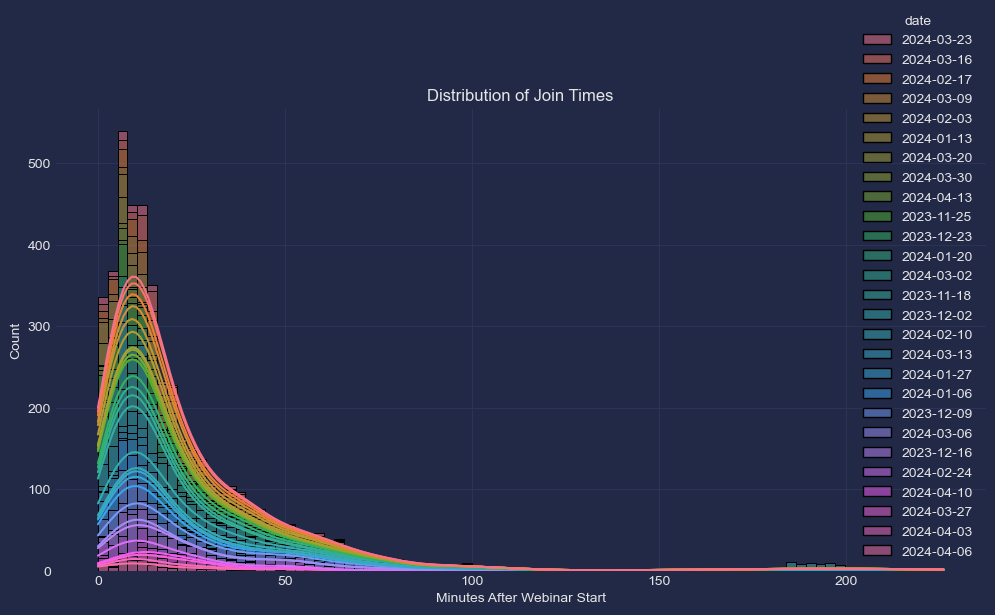

Key Insights:

Date: 2023-11-18
Webinar start time: 2023-11-18 11:55:03
Webinar end time: 2023-11-18 13:34:55
Total duration: 99.87 minutes
Peak attendance time: 12:17:03
Peak attendance: 319
Average join time: 16.64 minutes after start
Median attendance duration: 24.03 minutes
90th percentile of attendance duration: 71.83 minutes

Date: 2023-11-25
Webinar start time: 2023-11-25 11:55:43
Webinar end time: 2023-11-25 14:00:55
Total duration: 125.20 minutes
Peak attendance time: 12:27:43
Peak attendance: 178
Average join time: 19.30 minutes after start
Median attendance duration: 50.37 minutes
90th percentile of attendance duration: 101.70 minutes

Date: 2023-12-02
Webinar start time: 2023-12-02 11:55:32
Webinar end time: 2023-12-02 13:43:14
Total duration: 107.70 minutes
Peak attendance time: 12:28:32
Peak attendance: 166
Average join time: 23.26 minutes after start
Median attendance duration: 27.68 minutes
90th percentile of attendance duration: 85.57 minutes

Date: 2023-12-09
Webinar 

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

df = data[(data['join_time'].notna()) & (data['leave_time'].notna())]

df['join_time'] = pd.to_datetime(df['join_time'])
df['leave_time'] = pd.to_datetime(df['leave_time'])

df['date'] = df['join_time'].dt.date

webinar_times = df.groupby('date').agg({
    'join_time': 'min',
    'leave_time': 'max'
}).rename(columns={'join_time': 'webinar_start', 'leave_time': 'webinar_end'})

df = df.merge(webinar_times, left_on='date', right_index=True)
df['minutes_after_start'] = (df['join_time'] - df['webinar_start']).dt.total_seconds() / 60
df['minutes_before_end'] = (df['webinar_end'] - df['leave_time']).dt.total_seconds() / 60

df['attendance_duration'] = (df['leave_time'] - df['join_time']).dt.total_seconds() / 60

def calculate_attendance(group):
    time_range = pd.date_range(start=group['webinar_start'].iloc[0], end=group['webinar_end'].iloc[0], freq='1min')
    attendance_count = pd.Series(0, index=time_range)
    for _, row in group.iterrows():
        start_time = max(row['join_time'], attendance_count.index[0])
        end_time = min(row['leave_time'], attendance_count.index[-1])
        mask = (attendance_count.index >= start_time) & (attendance_count.index <= end_time)
        attendance_count[mask] += 1
    return attendance_count

attendance_by_date = df.groupby('date').apply(calculate_attendance)
peak_attendance = attendance_by_date.groupby(level=0).max()
peak_attendance_time = attendance_by_date.groupby(level=0).idxmax()
peak_attendance_time = peak_attendance_time.apply(lambda x: pd.Timestamp(x[1]).time())

dropout_times = df.groupby('date')['leave_time'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='minutes_after_start', hue='date', kde=True, multiple='stack')
plt.title('Distribution of Join Times')
plt.xlabel('Minutes After Webinar Start')
plt.show()

print("Key Insights:")
for date, group in df.groupby('date'):
    print(f"\nDate: {date}")
    print(f"Webinar start time: {group['webinar_start'].iloc[0]}")
    print(f"Webinar end time: {group['webinar_end'].iloc[0]}")
    print(f"Total duration: {(group['webinar_end'].iloc[0] - group['webinar_start'].iloc[0]).total_seconds() / 60:.2f} minutes")
    print(f"Peak attendance time: {peak_attendance_time.loc[date]}")
    print(f"Peak attendance: {peak_attendance.loc[date]}")
    print(f"Average join time: {group['minutes_after_start'].mean():.2f} minutes after start")
    print(f"Median attendance duration: {group['attendance_duration'].median():.2f} minutes")
    print(f"90th percentile of attendance duration: {group['attendance_duration'].quantile(0.9):.2f} minutes")

optimal_duration = df['attendance_duration'].quantile(0.9)
print(f"\nSuggested optimal duration: {optimal_duration:.2f} minutes")

df['day_of_week'] = df['join_time'].dt.day_name()
df['hour_of_day'] = df['join_time'].dt.hour
best_day = df.groupby('day_of_week')['Leads ID'].count().idxmax()
best_hour = df.groupby('hour_of_day')['Leads ID'].count().idxmax()
print(f"Best day of the week: {best_day}")
print(f"Best hour of the day: {best_hour}:00")

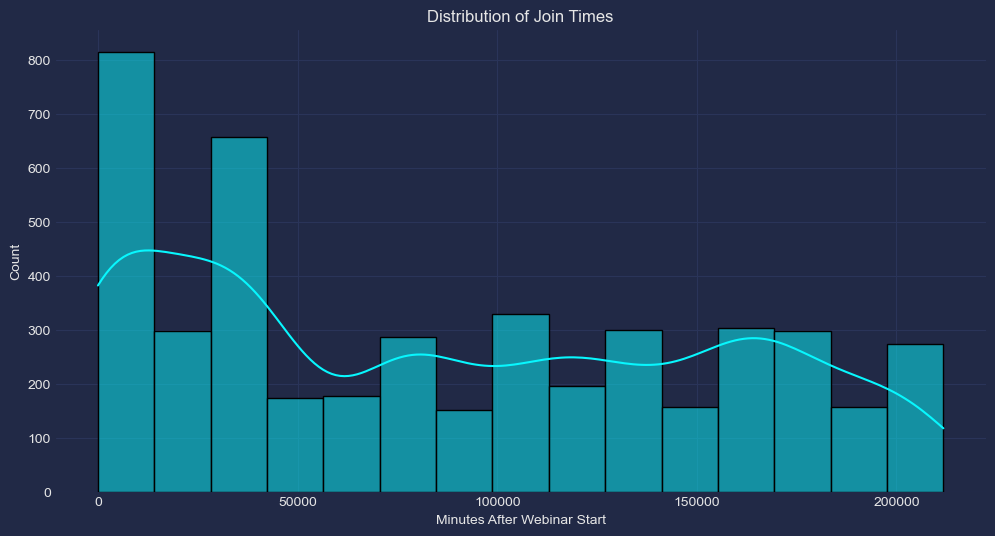

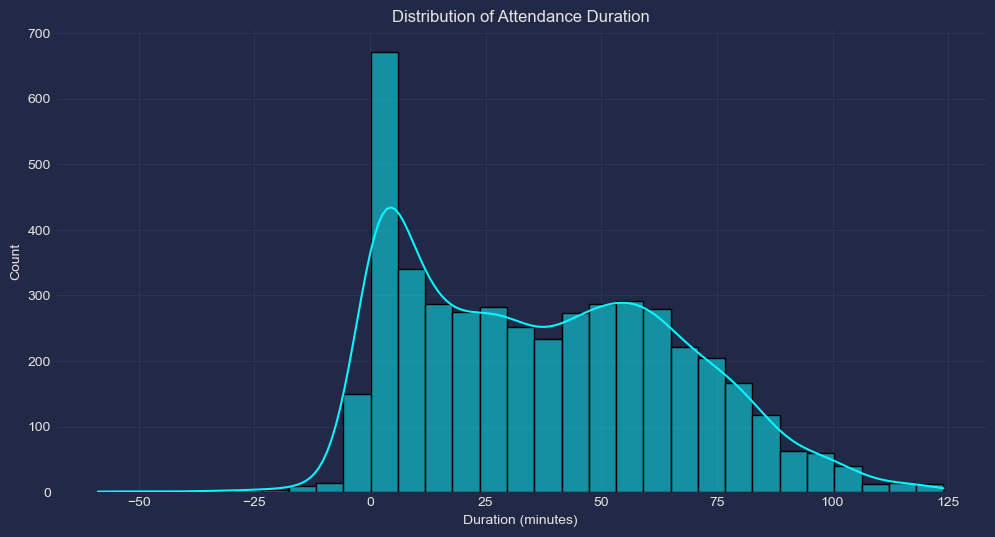

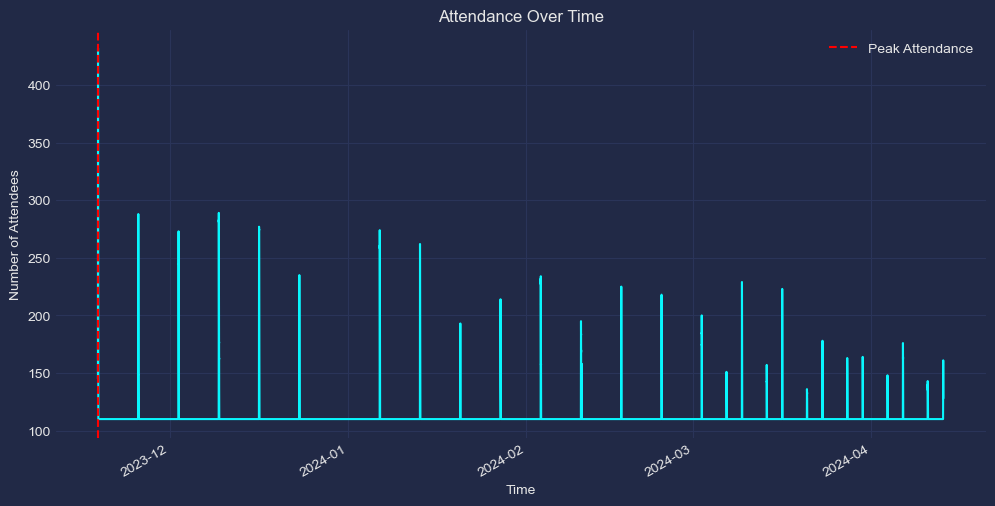

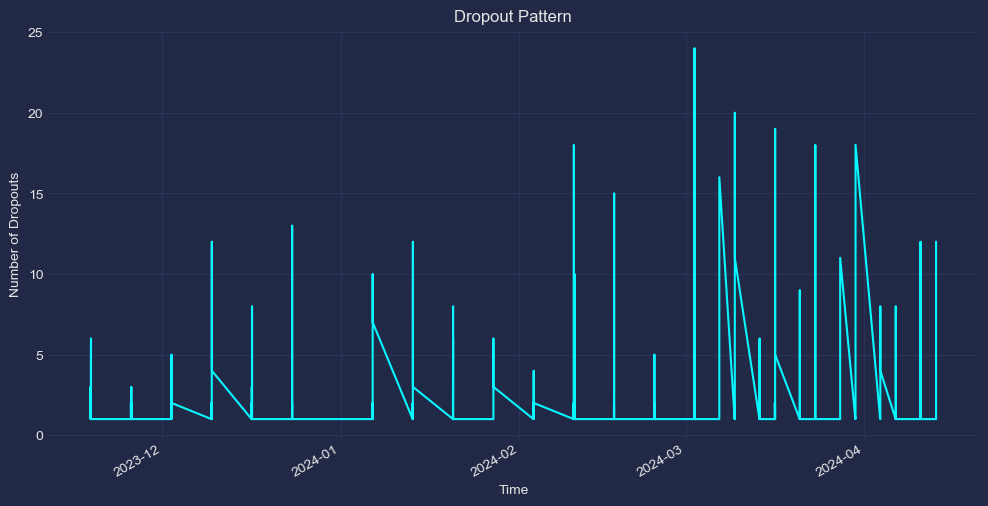

Webinar start time: 2023-11-18 11:55:03
Webinar end time: 2024-04-13 13:13:16
Total duration: 211758.22 minutes
Peak attendance time: 2023-11-18 12:17:03
Peak attendance: 432
Average join time: 87329.70 minutes after start
Median attendance duration: 35.28 minutes
90th percentile of attendance duration: 77.71 minutes
Suggested optimal duration: 77.71 minutes
Best day of the week: Saturday
Best hour of the day: 12:00


In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

df = data[(data['join_time'].notna()) & (data['leave_time'].notna())]

df['join_time'] = pd.to_datetime(df['join_time'])
df['leave_time'] = pd.to_datetime(df['leave_time'])

webinar_start = df['join_time'].min()
webinar_end = df['leave_time'].max()

df['minutes_after_start'] = (df['join_time'] - webinar_start).dt.total_seconds() / 60
df['minutes_before_end'] = (webinar_end - df['leave_time']).dt.total_seconds() / 60
df['attendance_duration'] = (df['leave_time'] - df['join_time']).dt.total_seconds() / 60

time_range = pd.date_range(start=webinar_start, end=webinar_end, freq='1min')
attendance_count = pd.Series(0, index=time_range)
for _, row in df.iterrows():
    start_index = attendance_count.index.get_indexer([row['join_time']], method='nearest')[0]
    end_index = attendance_count.index.get_indexer([row['leave_time']], method='nearest')[0]
    
    if end_index >= start_index:
        attendance_count.iloc[start_index:end_index+1] += 1
    else:
        
        attendance_count.iloc[start_index:] += 1
        attendance_count.iloc[:end_index+1] += 1
peak_attendance_time = attendance_count.idxmax()
peak_attendance = attendance_count.max()

dropout_times = df['leave_time'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.histplot(df['minutes_after_start'], kde=True)
plt.title('Distribution of Join Times')
plt.xlabel('Minutes After Webinar Start')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['attendance_duration'], kde=True)
plt.title('Distribution of Attendance Duration')
plt.xlabel('Duration (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
attendance_count.plot()
plt.title('Attendance Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Attendees')
plt.axvline(peak_attendance_time, color='r', linestyle='--', label='Peak Attendance')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
dropout_times.plot()
plt.title('Dropout Pattern')
plt.xlabel('Time')
plt.ylabel('Number of Dropouts')
plt.show()

print(f"Webinar start time: {webinar_start}")
print(f"Webinar end time: {webinar_end}")
print(f"Total duration: {(webinar_end - webinar_start).total_seconds() / 60:.2f} minutes")
print(f"Peak attendance time: {peak_attendance_time}")
print(f"Peak attendance: {peak_attendance}")
print(f"Average join time: {df['minutes_after_start'].mean():.2f} minutes after start")
print(f"Median attendance duration: {df['attendance_duration'].median():.2f} minutes")
print(f"90th percentile of attendance duration: {df['attendance_duration'].quantile(0.9):.2f} minutes")

optimal_duration = df['attendance_duration'].quantile(0.9)
print(f"Suggested optimal duration: {optimal_duration:.2f} minutes")

df['day_of_week'] = df['join_time'].dt.day_name()
df['hour_of_day'] = df['join_time'].dt.hour
best_day = df.groupby('day_of_week')['Leads ID'].count().idxmax()
best_hour = df.groupby('hour_of_day')['Leads ID'].count().idxmax()
print(f"Best day of the week: {best_day}")
print(f"Best hour of the day: {best_hour}:00")